# Flight_Delay_Prediction

# Prerequisites

In [2]:
#Import tools

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
encode = pd.read_csv('encode.csv')

In [ ]:
encode.shape

# Data Spliting

Training:60%
    
Tuning:20%

Test:20%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and temporary sets
train_data, temp_data = train_test_split(encode, test_size=0.4, random_state=42)

# Split the temporary set into tuning and test sets
tuning_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the size of each dataset
print("Training data size:", len(train_data))
print("Tuning data size:", len(tuning_data))
print("Test data size:", len(test_data))

In [ ]:
# Save the test data to a new file
train_data.to_csv('train_flight_data11.csv', index=False)
tuning_data.to_csv('tuning_flight_data11.csv', index=False)
test_data.to_csv('test_flight_data11.csv', index=False)

# Training Different Regression Models

•Simple Linear Regression

•Suport Vector Regression- LinearSVR-

•Deciscion Trees

-Simple Linear Regression:
Simple linear regression is a statistical method used to establish a relationship between two continuous variables. It is used when we want to predict the value of a dependent variable based on the value of an independent variable. The method involves fitting a straight line to the data that best fits the relationship between the two variables. It is useful in situations where there is a clear linear relationship between the variables.

-Support Vector Regression - LinearSVR:
Support Vector Regression (SVR) is a type of regression analysis that uses Support Vector Machines (SVM) to predict the values of a dependent variable based on the values of one or more independent variables. LinearSVR is a specific type of SVR that uses a linear kernel to map the data to a higher-dimensional space, where the relationship between the variables can be better modeled. This method is useful when the data has a linear relationship but has noise or outliers that make simple linear regression less effective.

-Decision Trees:
Decision Trees are a type of supervised machine learning algorithm that is used for both classification and regression tasks. The method involves building a tree-like model of decisions and their possible consequences. Each node in the tree represents a decision based on a feature or attribute of the data, and each branch represents the possible outcomes of that decision. Decision trees are useful when there are multiple variables that can influence the outcome, and the relationship between the variables is not linear. The method is also effective in handling missing data and noisy data.

# Simple Linear Regression

In [3]:
# Load the train data from the CSV file
train_data = pd.read_csv('train_flight_data11.csv')

In [3]:
train_data.columns

Index(['AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'MONTH_11',
       'MONTH_12', 'MONTH_2', 'MONTH_3',
       ...
       'D_STATE_TN', 'D_STATE_TX', 'D_STATE_UT', 'D_STATE_VA', 'D_STATE_VI',
       'D_STATE_VT', 'D_STATE_WA', 'D_STATE_WI', 'D_STATE_WV', 'D_STATE_WY'],
      dtype='object', length=770)

In [4]:
# Separate the features and target variables
X_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_arr_delay = train_data['ARRIVAL_DELAY']

In [5]:
# Train a linear regression model for predicting arrival delay
reg_arr = LinearRegression().fit(X_train, y_arr_delay)

In [6]:
# Make predictions using the training set
y_arr_delay_pred = reg_arr.predict(X_train)

In [7]:
# Predict the arrival delay using the trained model
y_pred_arr = reg_arr.predict(X_train)

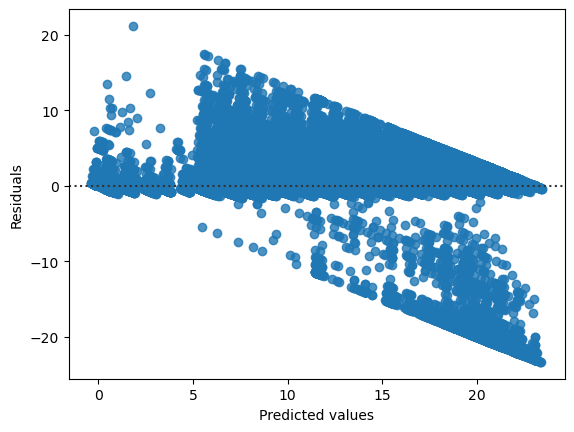

In [8]:
# Create a residual plot
sns.residplot(y_pred_arr, y_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

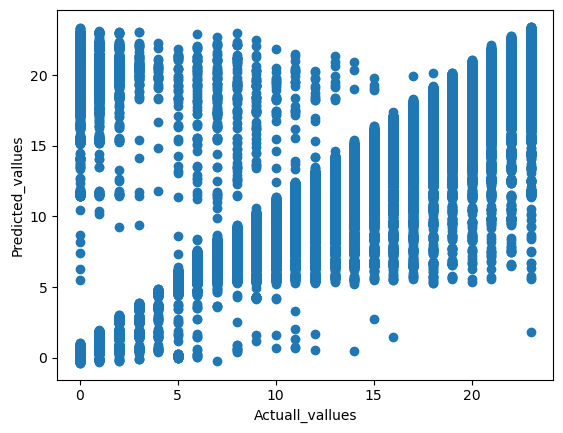

In [9]:
#scatter plot of two arrays: y_arr_delay, y_pred_arr.
plt.scatter(y_arr_delay, y_pred_arr)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [10]:
# Calculate the mean squared error
mse_arr_train = mean_squared_error(y_arr_delay, y_arr_delay_pred)

In [11]:
# Calculate the root mean squared error
rmse_arr_train = np.sqrt(mse_arr_train)

In [12]:
# Calculate the R-squared score
r2_arr_train = r2_score(y_arr_delay, y_arr_delay_pred)

In [13]:
print("Arrival delay - Mean Squared Error: ", mse_arr_train)
print("Arrival delay - Root Mean Squared Error: ", rmse_arr_train)
print("Arrival delay - R-squared score: ", r2_arr_train)

Arrival delay - Mean Squared Error:  3.768411755993395
Arrival delay - Root Mean Squared Error:  1.941239747170193
Arrival delay - R-squared score:  0.8366159249883893


In [4]:
# Load the tuning data from the CSV file
tuning_data = pd.read_csv('tuning_flight_data11.csv')

In [15]:
# Separate the features and target variables
X_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [16]:
# Evaluate the models on the tuning set
y_tuning_arr_pred = reg_arr.predict(X_tuning)

In [17]:
# Calculate the mean squared error
mse_arrival = mean_squared_error(y_tuning_arr_delay, y_tuning_arr_pred)

In [18]:
# Calculate the root mean squared error
rmse_arrival = np.sqrt(mse_arrival)

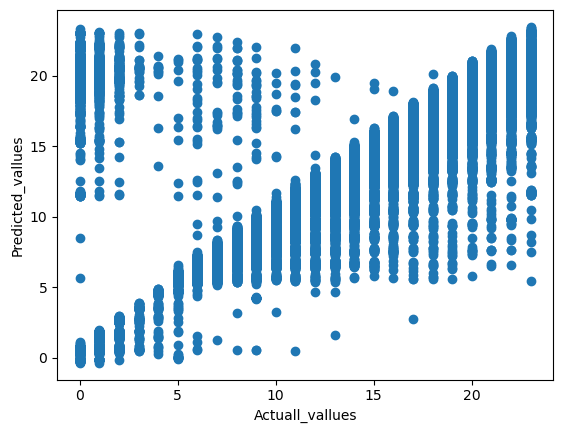

In [19]:
# scatter plot of two arrays: y_tuning_arr_delay and y_tuning_arr_pred.
plt.scatter(y_tuning_arr_delay, y_tuning_arr_pred)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [20]:
# Calculate the R-squared score
r2_arrival = r2_score(y_tuning_arr_delay, y_tuning_arr_pred)

In [21]:
print("Arrival delay - Mean Squared Error: ", mse_arrival)
print("Arrival delay - Root Mean Squared Error: ", rmse_arrival)
print("Arrival delay - R-squared score: ", r2_arrival)

Arrival delay - Mean Squared Error:  3.8141767519656544
Arrival delay - Root Mean Squared Error:  1.9529917439573712
Arrival delay - R-squared score:  0.8347791156379682


In [5]:
# Load the test data from the CSV file
test_data = pd.read_csv('test_flight_data11.csv')

In [23]:
# Separate the features and target variables
X_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_test_arr_delay = test_data['ARRIVAL_DELAY']


In [24]:
# Make predictions using the trained model
y_test_arr_pred = reg_arr.predict(X_test)

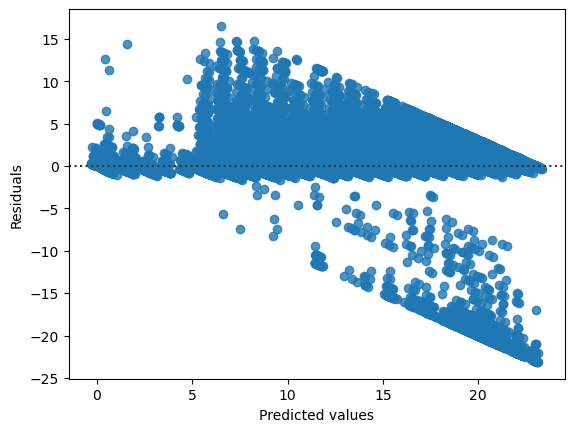

In [25]:
# Create a residual plot
sns.residplot(y_test_arr_pred, y_test_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [26]:
# Calculate the mean squared error
mse_test_arrival = mean_squared_error(y_test_arr_delay, y_test_arr_pred)

In [27]:
# Calculate the root mean squared error
rmse_test_arrival = np.sqrt(mse_test_arrival)

In [28]:
# Calculate the R-squared score
r2_test_arrival = r2_score(y_test_arr_delay, y_test_arr_pred)

In [29]:
print("Simple Linear Regression- Test:")
print("Arrival delay - Mean Squared Error (Test set): ", mse_test_arrival)
print("Arrival delay - Root Mean Squared Error (Test set): ", rmse_test_arrival)
print("Arrival delay - R-squared score (Test set): ", r2_test_arrival)

Simple Linear Regression- Test:
Arrival delay - Mean Squared Error (Test set):  3.805905503753083
Arrival delay - Root Mean Squared Error (Test set):  1.9508730106680656
Arrival delay - R-squared score (Test set):  0.8354907243276193


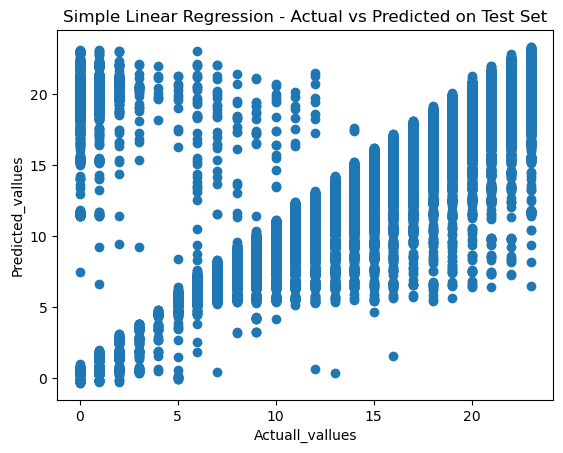

In [30]:
# scatter plot of two arrays: y_test_arr_delay and y_test_arr_pred.
plt.scatter(y_test_arr_delay, y_test_arr_pred)
plt.title("Simple Linear Regression - Actual vs Predicted on Test Set")
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

# Suport Vector Regression- LinearSVR-

In [31]:
# Separate the features and target variables
X_v_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_arr_delay = train_data['ARRIVAL_DELAY']

In [32]:
# Train a LinearSVR model for predicting arrival delay
reg_v_arr = LinearSVR(random_state=42).fit(X_v_train, y_v_arr_delay)

In [33]:
# Separate the features and target variables
X_v_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [34]:
# Evaluate the model on the tuning set
y_v_tuning_pred = reg_v_arr.predict(X_v_tuning)

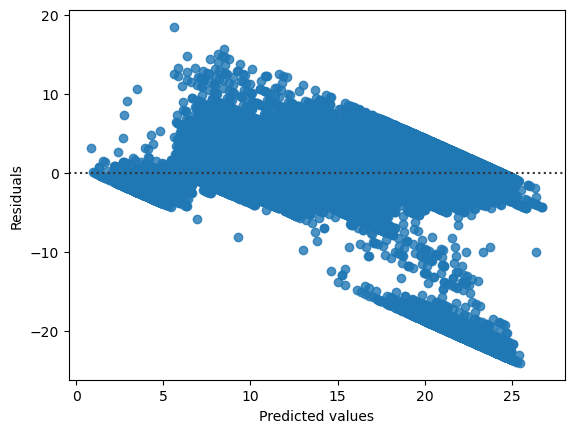

In [35]:
# Create a residual plot
sns.residplot(y_v_tuning_pred, y_v_tuning_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [36]:
# Calculate the mean squared error
mse_v_tuning = mean_squared_error(y_v_tuning_arr_delay, y_v_tuning_pred)

In [37]:
# Calculate the root mean squared error
rmse_v_tuning = np.sqrt(mse_v_tuning)

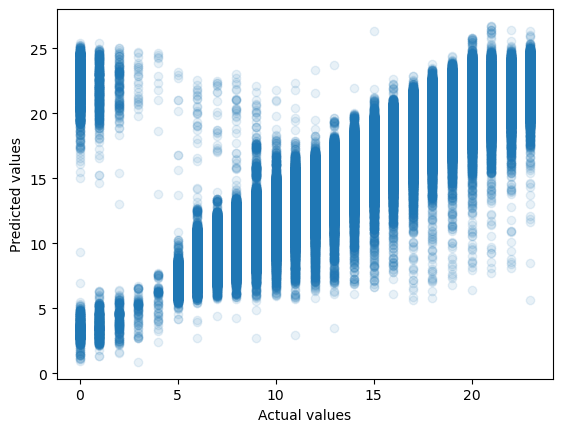

In [38]:
# Plot the predicted values against the actual values
plt.scatter(y_v_tuning_arr_delay, y_v_tuning_pred, alpha=0.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [39]:
# Calculate the R-squared score
r2_v_tuning = r2_score(y_v_tuning_arr_delay, y_v_tuning_pred)

print("Arrival delay - Mean Squared Error: ", mse_v_tuning)
print("Arrival delay - Root Mean Squared Error: ", rmse_v_tuning)
print("Arrival delay - R-squared score: ", r2_v_tuning)

Arrival delay - Mean Squared Error:  6.462677623321718
Arrival delay - Root Mean Squared Error:  2.5421796992584373
Arrival delay - R-squared score:  0.7200524826958667


In [40]:
# Separate the features and target variables for the test set
X_v_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_test_arr_delay = test_data['ARRIVAL_DELAY']

In [41]:
# Make predictions on the test set using the trained model
y_v_test_pred = reg_v_arr.predict(X_v_test)

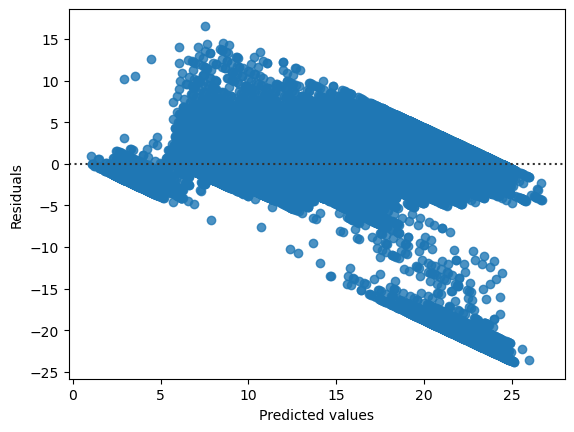

In [44]:
# Create a residual plot
sns.residplot(y_v_test_pred, y_v_test_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [45]:
# Calculate the mean squared error on the test set
mse_v_test = mean_squared_error(y_v_test_arr_delay, y_v_test_pred)

# Calculate the root mean squared error on the test set
rmse_v_test = np.sqrt(mse_v_test)

# Calculate the R-squared score on the test set
r2_v_test = r2_score(y_v_test_arr_delay, y_v_test_pred)

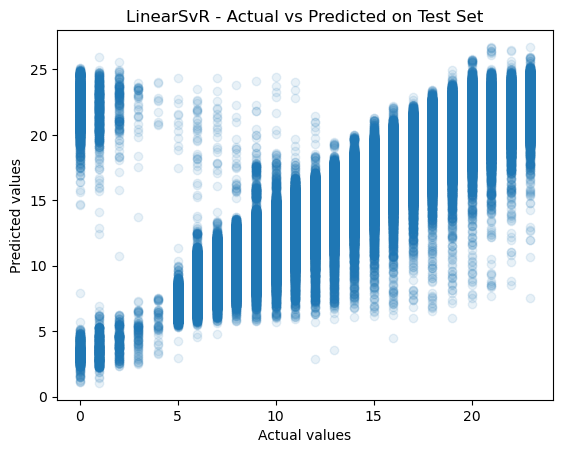

In [46]:
# Plot the predicted values against the actual values
plt.scatter(y_v_test_arr_delay, y_v_test_pred, alpha=0.1)
plt.title("LinearSvR - Actual vs Predicted on Test Set")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [47]:
# Print the evaluation metrics for the test set
print("LinearSvR - test set:")
print("Arrival delay - Mean Squared Error (Test set): ", mse_v_test)
print("Arrival delay - Root Mean Squared Error (Test set): ", rmse_v_test)
print("Arrival delay - R-squared score (Test set): ", r2_v_test)

LinearSvR - test set:
Arrival delay - Mean Squared Error (Test set):  6.46089379833916
Arrival delay - Root Mean Squared Error (Test set):  2.5418288294728186
Arrival delay - R-squared score (Test set):  0.7207295457249722


# Deciscion Trees

In [9]:
# Separate the features and target variables
X_t_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_arr_delay = train_data['ARRIVAL_DELAY']

In [10]:
X_t_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [11]:
# Create a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

In [12]:
# Train the model on the training set
tree_reg.fit(X_t_train, y_t_arr_delay)

DecisionTreeRegressor(random_state=42)

In [13]:
# Make predictions on the training set
y_t_arr_delay_pred = tree_reg.predict(X_t_train)

In [14]:
# Evaluate the model on the tuning set
y_t_tuning_arr_pred = tree_reg.predict(X_t_tuning)

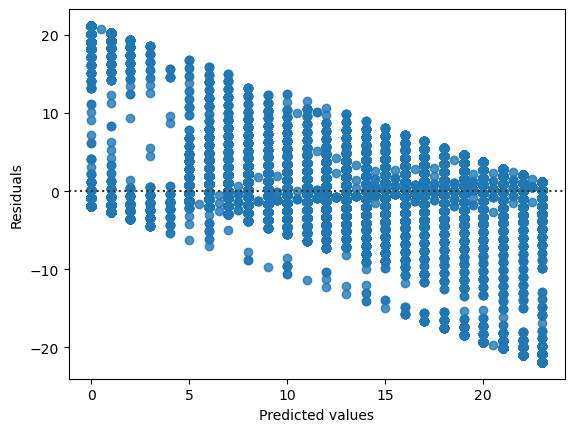

In [15]:
# Create a residual plot
sns.residplot(y_t_tuning_arr_pred, y_t_tuning_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [16]:
# Calculate the mean squared error and R-squared score on the training set
mse_t_train = mean_squared_error(y_t_arr_delay, y_t_arr_delay_pred)
r2_t_train = r2_score(y_t_arr_delay, y_t_arr_delay_pred)
rmse_t_train = np.sqrt(mean_squared_error(y_t_arr_delay, y_t_arr_delay_pred))

In [17]:
print("Decision tree regression - training set:")
print("Mean Squared Error:", mse_t_train)
print("Root Mean Squared Error:", rmse_t_train)
print("R-squared score:", r2_t_train)

Decision tree regression - training set:
Mean Squared Error: 0.005439482255793138
Root Mean Squared Error: 0.07375284574708381
R-squared score: 0.9997641646310302


In [18]:
# Calculate the mean squared error and R-squared score on the tuning set
mse_t_tuning = mean_squared_error(y_t_tuning_arr_delay, y_t_tuning_arr_pred)
r2_t_tuning = r2_score(y_t_tuning_arr_delay, y_t_tuning_arr_pred)
rmse_t_tuning = np.sqrt(mean_squared_error(y_t_tuning_arr_delay, y_t_tuning_arr_pred))

In [19]:
print("Decision tree regression - tuning set:")
print("Root Mean Squared Error:", rmse_t_tuning)
print("Mean Squared Error:", mse_t_tuning)
print("R-squared score:", r2_t_tuning)

Decision tree regression - tuning set:
Root Mean Squared Error: 2.428531102990679
Mean Squared Error: 5.897763318193125
R-squared score: 0.7445232000096378


In [20]:
# Separate the features and target variables
X_t_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_test_arr_delay = test_data['ARRIVAL_DELAY']

In [21]:
# Make predictions on the test set
y_t_test_arr_delay_pred = tree_reg.predict(X_t_test)

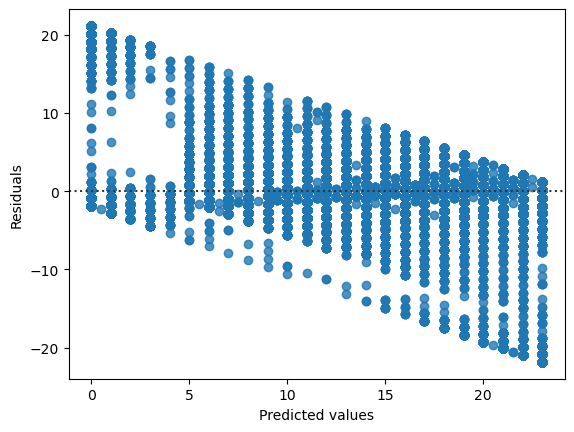

In [22]:
# Create a residual plot
sns.residplot(y_t_test_arr_delay_pred, y_t_test_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [23]:
# Calculate the mean squared error and R-squared score on the test set
mse_t_test = mean_squared_error(y_t_test_arr_delay, y_t_test_arr_delay_pred)
# Calculate the RMSE on the test set
rmse_t_test = np.sqrt(mean_squared_error(y_t_test_arr_delay, y_t_test_arr_delay_pred))
r2_t_test = r2_score(y_t_test_arr_delay, y_t_test_arr_delay_pred)

In [24]:
print("Decision tree regression - test set:")
print("Mean Squared Error:", mse_t_test)
print("Root Mean Squared Error:", rmse_t_test)
print("R-squared score:", r2_t_test)

Decision tree regression - test set:
Mean Squared Error: 5.987808657957149
Root Mean Squared Error: 2.4469999301097554
R-squared score: 0.7411785278919925


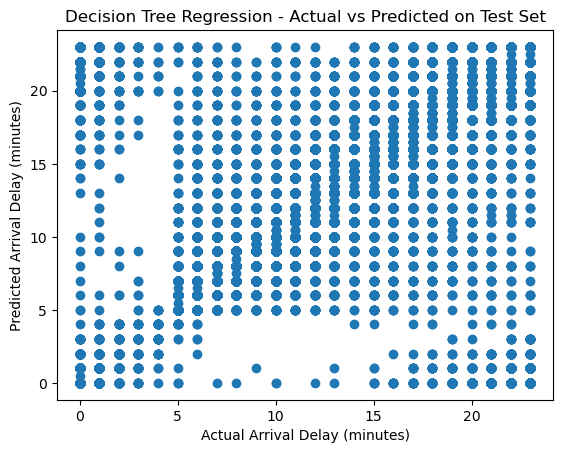

In [25]:
import matplotlib.pyplot as plt

# plot the actual vs predicted values on the test set
plt.scatter(y_t_test_arr_delay, y_t_test_arr_delay_pred)
plt.xlabel("Actual Arrival Delay (minutes)")
plt.ylabel("Predicted Arrival Delay (minutes)")
plt.title("Decision Tree Regression - Actual vs Predicted on Test Set")
plt.show()


# Result Summery:

•Score Overview:

1. Simple Linear Regression- Test:
-Arrival delay - Mean Squared Error (Test set): 3.805905503753083

-Arrival delay - Root Mean Squared Error (Test set): 1.9508730106680656

-Arrival delay - R-squared score (Test set): 0.8354907243276193

2. LinearSvR - test set:
-Arrival delay - Mean Squared Error (Test set): 6.46089379833916

-Arrival delay - Root Mean Squared Error (Test set): 2.5418288294728186

-Arrival delay - R-squared score (Test set): 0.7207295457249722

3. Decision tree regression - test set:
-Mean Squared Error: 5.987808657957149

-Root Mean Squared Error: 2.4469999301097554

-R-squared score: 0.7411785278919925

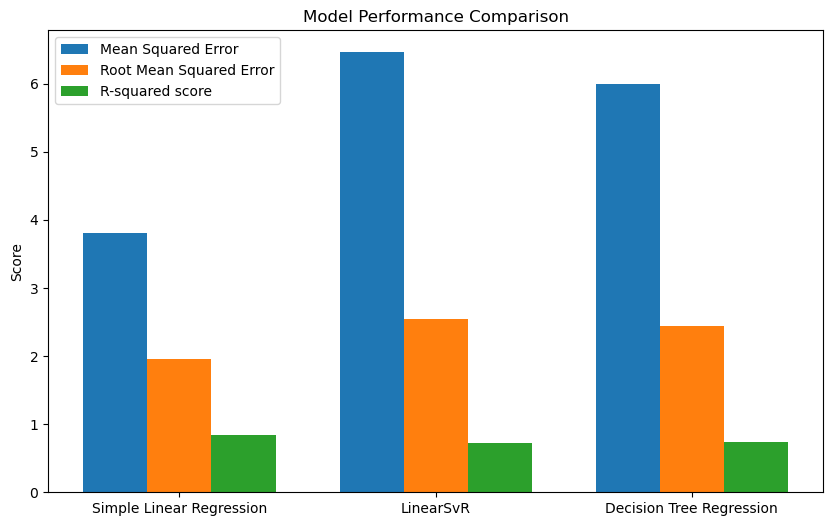

In [27]:
# Set the width of each bar
bar_width = 0.25

# Set the x positions of the bars
r1 = np.arange(len(mse_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean squared error, root mean squared error, and R-squared score bars
mse_bars = ax.bar(r1, mse_values, width=bar_width, label='Mean Squared Error')
rmse_bars = ax.bar(r2, rmse_values, width=bar_width, label='Root Mean Squared Error')
r2_bars = ax.bar(r3, r2_values, width=bar_width, label='R-squared score')

# Add labels, tick marks, and adjust spacing
ax.set_xticks([r + bar_width for r in range(len(mse_values))])
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
plt.legend()

# Show the plot
plt.show()